In [ ]:
import pandas as pd

files = [
    "api_data_aadhar_demographic_0_500000.csv",
    "api_data_aadhar_demographic_500000_1000000.csv",
    "api_data_aadhar_demographic_1000000_1500000.csv",
    "api_data_aadhar_demographic_1500000_2000000.csv",
    "api_data_aadhar_demographic_2000000_2071700.csv",
]

df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

df.head()


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


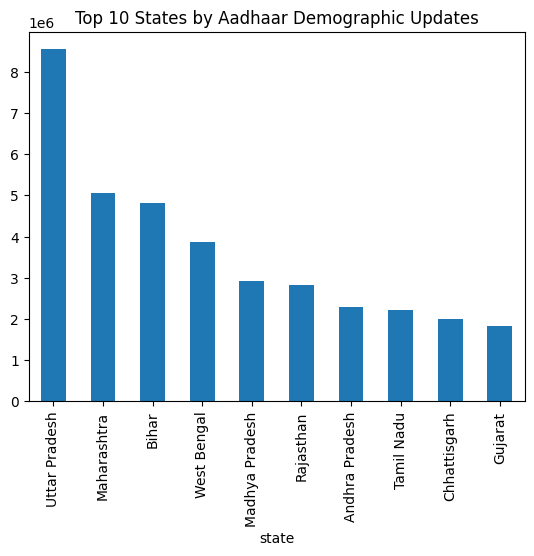

In [ ]:
import matplotlib.pyplot as plt

# date ko proper format me lao
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# total updates column banao
df['total_updates'] = df['demo_age_5_17'] + df['demo_age_17_']

# state-wise total
state_updates = df.groupby('state')['total_updates'].sum().sort_values(ascending=False)

# bar graph (top 10 states)
state_updates.head(10).plot(kind='bar', title='Top 10 States by Aadhaar Demographic Updates')
plt.show()


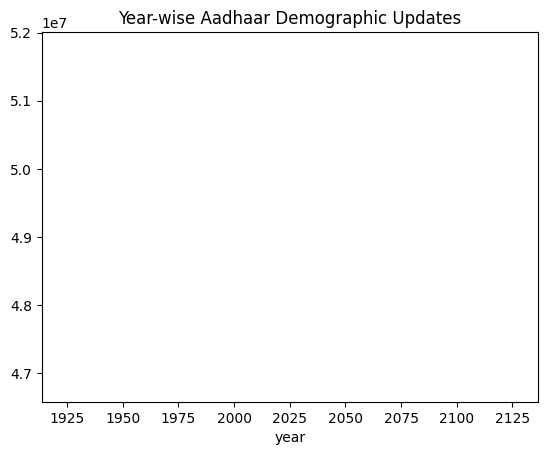

In [ ]:
# year column
df['year'] = df['date'].dt.year

# year-wise total updates
yearly_updates = df.groupby('year')['total_updates'].sum()

# line graph
yearly_updates.plot(kind='line', title='Year-wise Aadhaar Demographic Updates')
plt.show()
